In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import skew
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 

In [3]:
df = pd.read_csv('Credit_scoring.csv', index_col=False)
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


##### 1. Nêu thông tin về kiểu dữ liệu và khoảng dữ liệu ở các cột

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149992 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 2   age                                   149992 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 4   DebtRatio                             149992 non-null  float64
 5   MonthlyIncome                         120262 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 7   NumberOfTimes90DaysLate               149992 non-null  int64  
 8   NumberRealEstateLoansOrLines          149992 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 10  NumberOfDependents                    146068 non-null  float64
dtype

In [5]:
df.shape

(149992, 11)

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149992.000000,149992.000000,149992.000000,149992.000000,149992.000000,1.202620e+05,149992.000000,149992.000000,149992.000000,149992.000000,146068.000000
mean,0.066837,6.048729,52.295516,0.421029,352.985824,6.669872e+03,8.452877,0.265981,1.018221,0.240399,0.757236
std,0.249740,249.762028,14.771902,4.192890,2037.824499,1.438414e+04,5.146006,4.169414,1.129704,4.155290,1.115103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029863,41.000000,0.000000,0.175075,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154162,52.000000,0.000000,0.366516,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559012,63.000000,0.000000,0.868292,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


##### 2. Kiểm tra dữ liệu khuyết thiếu

In [7]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29730
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [8]:
df[df.isna().any(axis=1)]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.0,NaN,2,0,0,0,NaN
8,0,0.061086,78,0,2058.0,NaN,10,0,2,0,0.0
24,0,0.083418,62,0,977.0,NaN,6,0,1,0,0.0
33,0,0.072898,81,0,75.0,NaN,7,0,0,0,0.0
44,0,1.000000,62,0,0.0,NaN,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149968,0,0.000627,76,0,60.0,NaN,5,0,0,0,0.0
149969,0,0.236450,29,0,349.0,NaN,3,0,0,0,0.0
149976,0,0.037548,84,0,25.0,NaN,5,0,0,0,0.0
149984,0,0.871976,50,0,4132.0,NaN,11,0,1,0,3.0


##### 3. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột

In [9]:
df2 = df.interpolate(axis=1)
df2 

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.0,0.116951,27.0,0.0,46.000000,24.0,2.0,0.0,0.0,0.0,0.0
1,0.0,0.189169,57.0,0.0,0.606291,23684.0,9.0,0.0,4.0,0.0,2.0
2,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149987,0.0,0.040674,74.0,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0.0
149988,0.0,0.299745,44.0,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2.0
149989,0.0,0.246044,58.0,0.0,3870.000000,1944.0,18.0,0.0,1.0,0.0,0.0
149990,0.0,0.000000,30.0,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0.0


##### 4. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu bằng giá trị 0

In [10]:
df3 = df.fillna(0)

In [11]:
df3

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.116951,27,0,46.000000,0.0,2,0,0,0,0.0
1,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
149987,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149988,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149989,0,0.246044,58,0,3870.000000,0.0,18,0,1,0,0.0
149990,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


##### 5. Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

In [12]:
df3.columns.unique

<bound method Index.unique of Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')>

<AxesSubplot:>

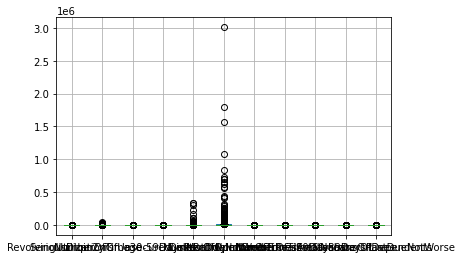

In [13]:
df3[['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age','NumberOfTime30-59DaysPastDueNotWorse',\
    'DebtRatio', 'MonthlyIncome','NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines',\
        'NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents']].boxplot()

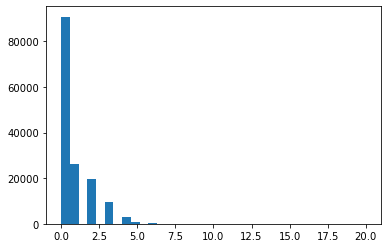

In [14]:
plt.hist(df3['NumberOfDependents'], bins = 35);

##### 6. Loại bỏ giá trị ngoại lai ( dùng bộ dữ liệu đã nội suy)

In [15]:
Q1 = df2.quantile(q = 0.25)
Q3 = df2.quantile(q = 0.75)
IQR = Q3 - Q1

In [16]:
df2 = df2[~((df2 < Q1 - 1.5* IQR) | (df2 > Q3 + 1.5*IQR)).any(axis = 1)]

In [17]:
df2.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,76890.0,76890.000000,76890.000000,76890.0,76890.000000,76890.000000,76890.000000,76890.0,76890.000000,76890.0,76890.000000
mean,0.0,0.264318,52.929185,0.0,0.317611,5714.681226,8.049395,0.0,0.931552,0.0,0.518390
std,0.0,0.317195,15.385704,0.0,0.281695,3249.853682,4.299490,0.0,0.942512,0.0,0.743525
min,0.0,0.000000,21.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000
25%,0.0,0.023148,41.000000,0.0,0.111378,3312.000000,5.000000,0.0,0.000000,0.0,0.000000
50%,0.0,0.111537,53.000000,0.0,0.268449,5125.000000,7.000000,0.0,1.000000,0.0,0.000000
75%,0.0,0.417336,64.000000,0.0,0.443096,7705.750000,11.000000,0.0,2.000000,0.0,1.000000
max,0.0,1.341700,96.000000,0.0,1.908046,15605.000000,20.000000,0.0,5.000000,0.0,2.000000


<AxesSubplot:xlabel='MonthlyIncome'>

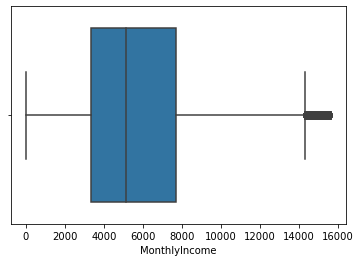

In [18]:
sns.boxplot(x = df2['MonthlyIncome'])

##### 7. Chia dữ liệu ở các cột 4,5,6 thành nhóm có số lượng phần tử bằng nhau và đếm số lượng phần tử ở mỗi nhóm, lấy ra khoảng giữ liệu của mỗi nhóm.

In [20]:
df2.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
2,0.0,0.644226,30.0,0.0,0.309476,2500.0,5.0,0.0,0.0,0.0,0.0
3,0.0,0.018798,51.0,0.0,0.531529,6501.0,7.0,0.0,2.0,0.0,2.0
4,0.0,0.010352,46.0,0.0,0.298354,12454.0,13.0,0.0,2.0,0.0,2.0
7,0.0,0.548458,64.0,0.0,0.209892,11362.0,7.0,0.0,1.0,0.0,2.0
9,0.0,0.166284,53.0,0.0,0.188274,8800.0,7.0,0.0,0.0,0.0,0.0


In [21]:
df2[['DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans']]

,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans
2,0.309476,2500.0,5.0
3,0.531529,6501.0,7.0
4,0.298354,12454.0,13.0
7,0.209892,11362.0,7.0
9,0.188274,8800.0,7.0
...,...,...,...
149986,0.404293,3400.0,7.0
149987,0.225131,2100.0,4.0
149988,0.716562,5584.0,4.0
149990,0.000000,5716.0,4.0


In [22]:
def count_value(col):
    return len(col.unique())

df2.agg(count_value)

SeriousDlqin2yrs                            1
RevolvingUtilizationOfUnsecuredLines    65630
age                                        76
NumberOfTime30-59DaysPastDueNotWorse        1
DebtRatio                               69231
MonthlyIncome                           10494
NumberOfOpenCreditLinesAndLoans            21
NumberOfTimes90DaysLate                     1
NumberRealEstateLoansOrLines                6
NumberOfTime60-89DaysPastDueNotWorse        1
NumberOfDependents                          3
dtype: int64